# Project 5: Machine Learning Modelling to Predict Deaths Associated with COVID-19

### Part 2: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import os
import glob

%matplotlib inline

In [2]:
# importing texas covid-19 data into a dataframe
df_texas = pd.read_csv('../data/texas_csv.csv',
                 na_values=[''], keep_default_na=False)

In [3]:
# Rename column names
df_texas.columns = [column.lower() for column in df_texas.columns]

In [4]:
# Check missing values
df_texas.isnull().sum()

province_state            0
country_region            0
last_update               0
lat                       0
long_                     0
confirmed                 0
deaths                    0
recovered                 0
active                    0
fips                      0
incident_rate             0
people_tested            52
people_hospitalized     184
mortality_rate           52
uid                       0
iso3                      0
testing_rate              0
hospitalization_rate    184
total_test_results      132
case_fatality_ratio     132
dtype: int64

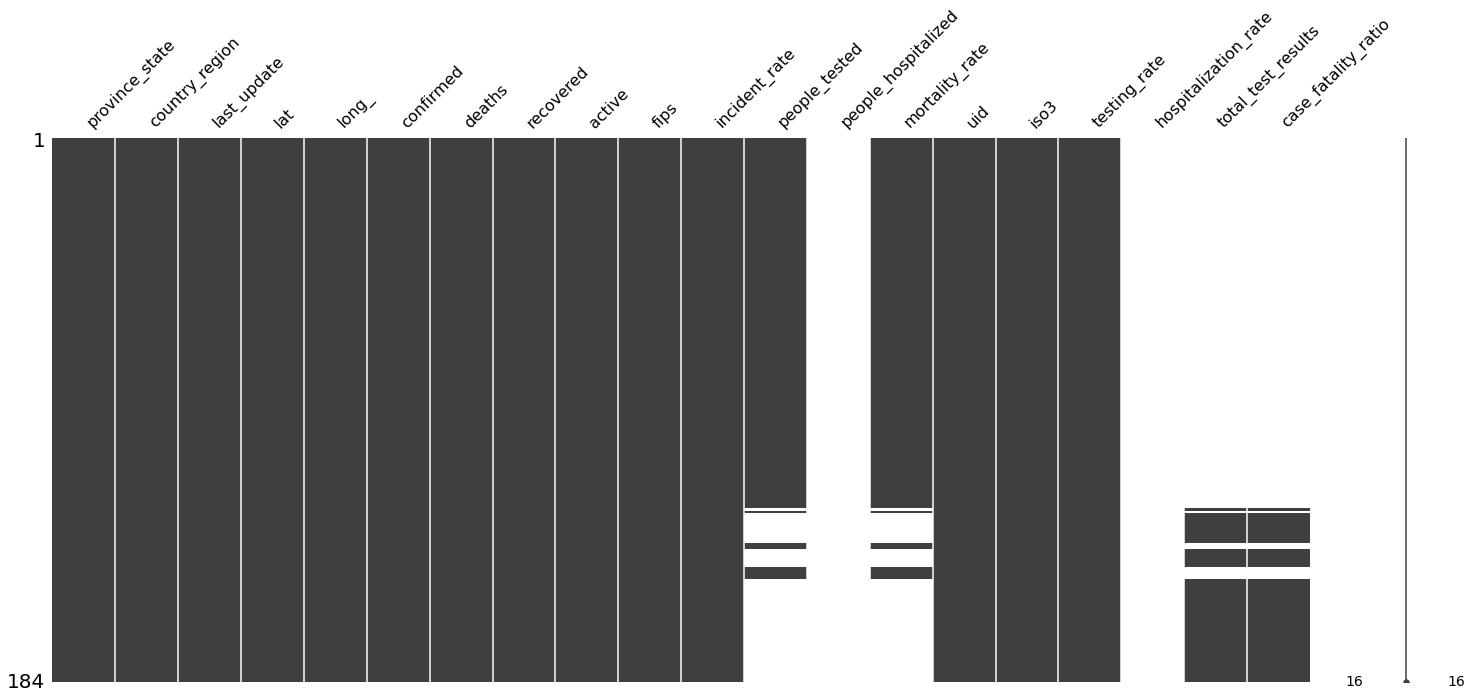

In [5]:
# Examine missing data
msno.matrix(df_texas);

In [6]:
# Drop 2 columns with 100% missing values: people_hospitalized and hospitalization_rate
df_texas = df_texas.drop(columns=['people_hospitalized', 'hospitalization_rate'])
df_texas.shape

(184, 18)

In [7]:
# Drop column: 'country_region', 'lat', 'long_', 'last_update', 'iso3'
df_texas = df_texas.drop(columns=['country_region', 'lat', 'long_', 'last_update', 'iso3'])

In [8]:
df_texas.columns

Index(['province_state', 'confirmed', 'deaths', 'recovered', 'active', 'fips',
       'incident_rate', 'people_tested', 'mortality_rate', 'uid',
       'testing_rate', 'total_test_results', 'case_fatality_ratio'],
      dtype='object')

#### Correlation matrix

<AxesSubplot:>

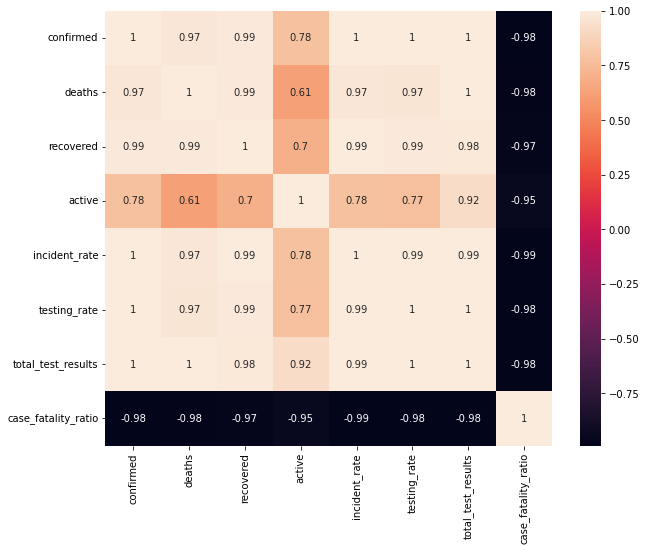

In [9]:
# heatmap to visualize correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_texas.drop(columns=['fips', 'uid', 'people_tested', 'mortality_rate']).corr(), annot=True)

Several features appear to be strongly correlated with deaths, especially 'recovered'.

Case_fatality ratio is very negatively coorelated with all features

#### Scatterplots

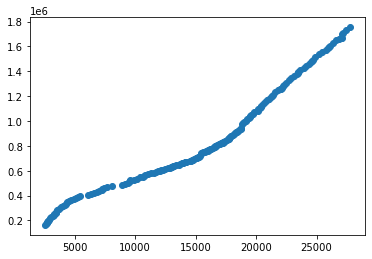

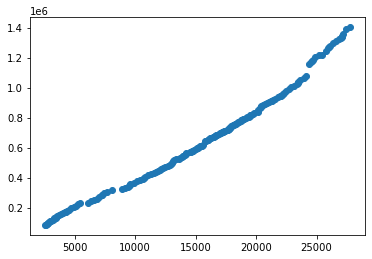

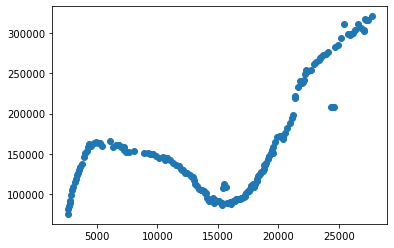

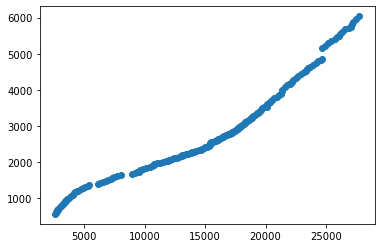

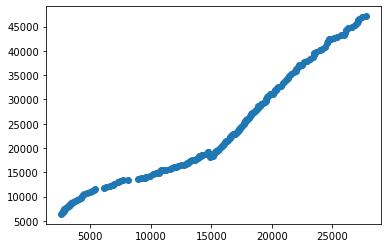

In [10]:
plt.scatter(df_texas['deaths'], df_texas['confirmed'])
plt.show();
plt.scatter(df_texas['deaths'], df_texas['recovered'])
plt.show();
plt.scatter(df_texas['deaths'], df_texas['active'])
plt.show();
plt.scatter(df_texas['deaths'], df_texas['incident_rate'])
plt.show();
plt.scatter(df_texas['deaths'], df_texas['testing_rate'])
plt.show();

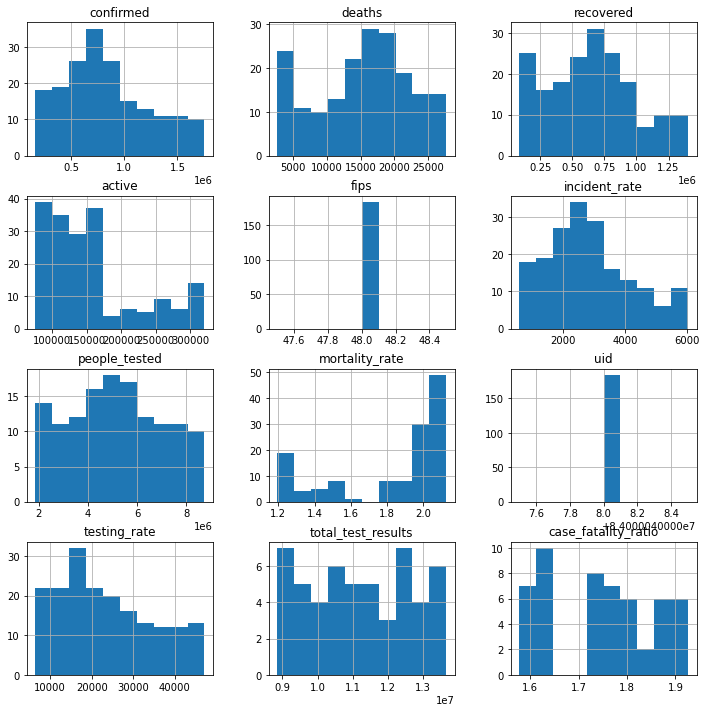

In [11]:
# histograms of numerical columns
df_texas.hist(figsize=(12, 12));

#### Boxplots

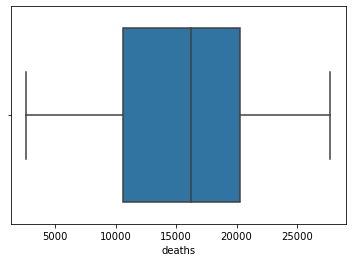

In [12]:
# boxplot visualizing the distribution of deaths
sns.boxplot(x = df_texas['deaths']);

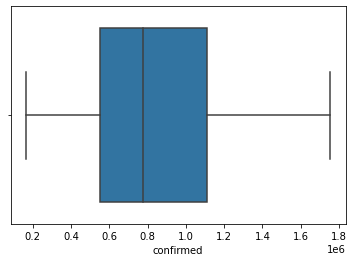

In [13]:
# boxplot visualizing the distribution of confirmed cases
sns.boxplot(x = df_texas['confirmed']);

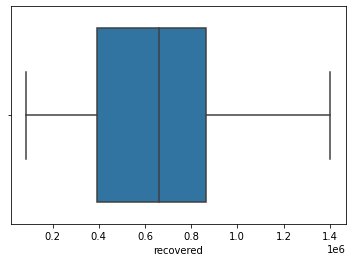

In [14]:
# boxplot visualizing the distribution of recovered caases
sns.boxplot(x = df_texas['recovered']);

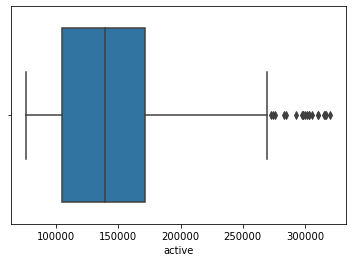

In [15]:
# boxplot visualizing the distribution of active COVID-19 cases
sns.boxplot(x = df_texas['active']);

Out of all of the boxplots, active cases seems to have the most outliers

In [16]:
# saving cleaned texas dataframe as a csv
df_texas.to_csv("../data/texas_clean_csv.csv", index=False, encoding='utf-8-sig')